# Word model

In [1]:
import numpy as np
from word_dataset import WordDataset
from word_model import WordRNN
from utils import prepare_sample

## Dataset

In [3]:
%%time
dataset = WordDataset()
dataset.load('data/dostoevsky.txt')  # dostoevsky.txt  anna.txt

CPU times: user 52.6 s, sys: 196 ms, total: 52.8 s
Wall time: 52.8 s


## Build

In [143]:
%%time
model_path  = 'models/word/dostoevsky-002/'
num_layers  = 3
num_units   = 256
grad_clip   = 5.0

model = WordRNN(
    num_classes = dataset.num_tokens)

model.build(
    emb_size   = 300,
    num_units  = num_units, 
    num_layers = num_layers, 
    grad_clip  = grad_clip)

CPU times: user 4.16 s, sys: 68 ms, total: 4.23 s
Wall time: 4.28 s


## Train

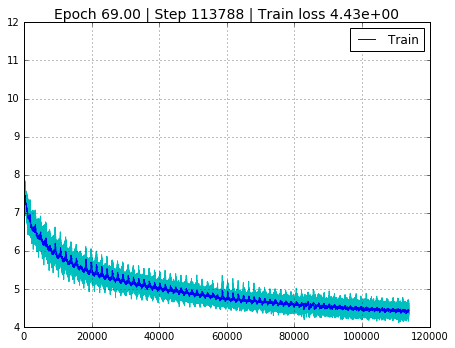

CPU times: user 2h 48min 32s, sys: 20min 57s, total: 3h 9min 30s
Wall time: 1h 52min 13s


In [167]:
%%time
model.train(
    epochs        = 100, 
    batch_size    = 32, 
    seq_length    = 30,
    learning_rate = 1e-3, 
    keep_prob     = .5,
    mean_win      = 100,
    dataset       = dataset)
model.save(model_path)

## Test

In [148]:
def prepare_sample(s):
    s = s.replace(' .', '.').replace(' ,', ',').replace(' !', '!').replace(' ?', '?').replace(' :', ':')
    s = s.replace('— —', '—').replace(',,', ',').replace(',.', ',').replace('« ', '«').replace(' »', '»')
    s = s.replace('—,', '—').replace('.,', '.')
    return s

In [185]:
primes = [
    'ох уж эти мне сказочники ! нет чтобы написать что-нибудь полезное , приятное , усладительное',
    'вчера я был счастлив , чрезмерно счастлив , донельзя счастлив !',
    'князь не ожидал', 
    'он смотрел на портрет настасьи', 
    'вошел рогожин', 
    'лебедев был пьян и', 
    'на скамье сидела аглая', 
    'генерал желал', 
    'новая мысль промелькнула', 
    'из петербурга приехали',
    'раскольников взял топор', 
    'коля стоял у окна', 
    'причиной убийства', 
    'он начал читать письмо', 
]
for prime in primes:
    print('-'*50)
    print(prepare_sample(model.sample(dataset, n_samples=80, top_n=20, prime=prime)))

--------------------------------------------------
ох уж эти мне сказочники! нет чтобы написать что-нибудь полезное, приятное, усладительное, если б мы в высшей степени в самом деле. я не говорю на всю ночь. я даже не могу, как я буду любить меня, и я буду знать, что, кажется, на все время, и я не знал, как это так легко, но все-таки он и сам. да я не понимаю в том, что я, пожалуй, может, и больше теперь. я не знал,
--------------------------------------------------
вчера я был счастлив, чрезмерно счастлив, донельзя счастлив! а если вы, кажется, что я это был, по привычке, и в самом деле? ведь это не может быть. но ведь мне, однако же, я очень рада — и не было бы, а не так, — так и и не знал ли вы меня, что вы думаете, не может быть. и вы, кажется, меня любите, как, и я и тогда не знаю,
--------------------------------------------------
князь не ожидал с ними! — проговорила катя, обращаясь к ним, — ну, что ж, ты с ним, что ли, он, когда я тебя хотел? это — да, говорит, с ним не хочу. о

## Restore

In [19]:
model.restore(model_path)

INFO:tensorflow:Restoring parameters from models/word/dostoevsky-001/


INFO:tensorflow:Restoring parameters from models/word/dostoevsky-001/


он смотрел на портрет настасьи филипповны. он был в каком-то волнении, в недоумении, но, кажется, не мог понять, что он не мог понять. — а вы, кажется, не знаете? — вскричал я, — я не знаю, что вы меня любите. я не знаю